In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [3]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [4]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [5]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [7]:
# The filenames are tentative. We will change the filenames.
on_nersc=False
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Blanc/'
    BGS = pd.read_csv(dir+'BGS/'+'desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')
    LRG = pd.read_csv(dir+'LRG'/+'desi-vi_LRG_tile80609_nightdeep_merged_all_210130.csv')
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80608_nightdeep_merged_all_210208.csv')
    ELG_80606 = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
else:
    dir = '/Users/tlan/Dropbox/Astro_Research/Projects_plots_notes/2020_DESI_visual_inspect/SV1/Truth_tables/'
    BGS = pd.read_csv(dir+'desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')
    LRG = pd.read_csv(dir+'desi-vi_LRG_tile80609_nightdeep_merged_all_210130.csv')
    ELG_80606 = pd.read_csv(dir+'desi-vi_ELG_tile80606_nightdeep_merged_all_210218.csv')
    ELG_80608 = pd.read_csv(dir+'desi-vi_ELG_tile80608_nightdeep_merged_all_210208.csv')
    ELG_80610 = pd.read_csv(dir+'desi-vi_ELG_tile80610_nightdeep_merged_all_210308.csv')
    #QSO = pd.read_csv('desi-vi_QSO_tile80609_nightdeep_merged_all_210202_ADDING_object_info.csv')

In [8]:
#BGS

# BGS

Number of BGS : 2718
Number of  BGS with quality>=2.5: 2593  | fration= 0.9540103016924208
Number of  BGS with quality==4: 2418  | fration= 0.8896247240618101
---------
Fraction of objects with quality>=2.5
Star: 0.0775163902815272
Galaxy: 0.9132279213266487
QSO: 0.009255688391824142


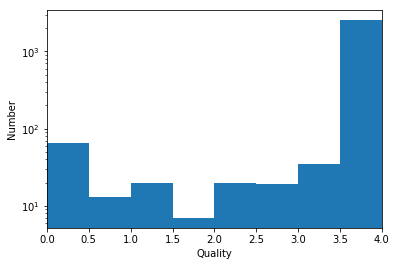

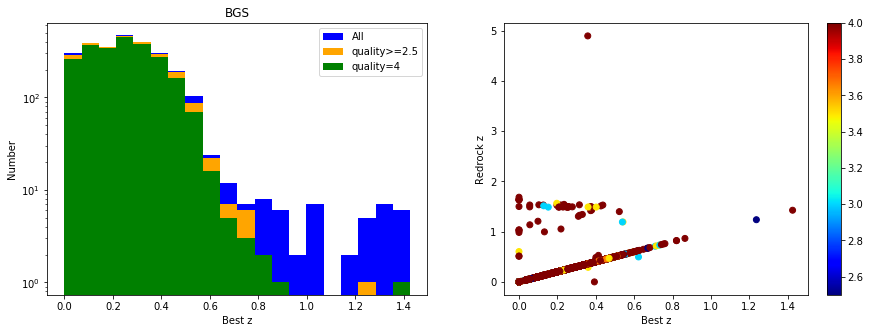

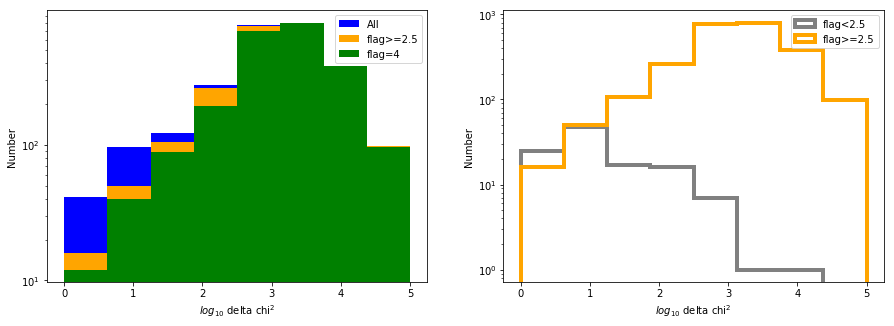

In [9]:
print_simple_number(BGS,'BGS')
plot_redshift_distribution(BGS,'BGS')
plot_chi2_quality_distribution(BGS)

In [10]:
cut_table= give_me_ra_dec_object_with_property_cut(BGS,'best_quality',[0,1],False)
len(cut_table)

78

# LRG

Number of LRG : 1789
Number of  LRG with quality>=2.5: 1747  | fration= 0.9765231973169368
Number of  LRG with quality==4: 1544  | fration= 0.8630519843487983
---------
Fraction of objects with quality>=2.5
Star: 0.008586147681740127
Galaxy: 0.9753863766456783
QSO: 0.01602747567258157


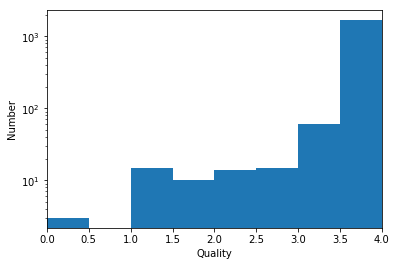

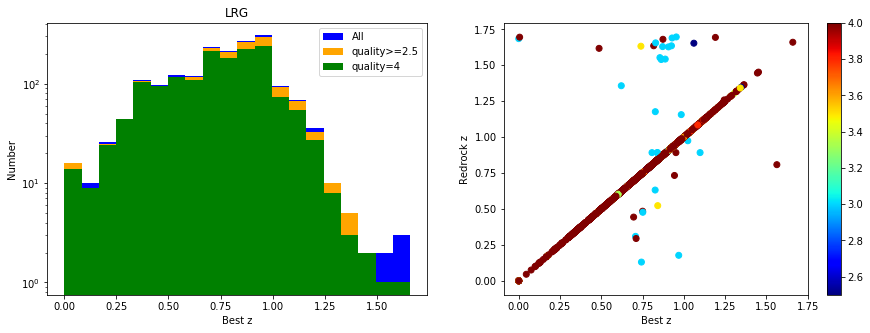

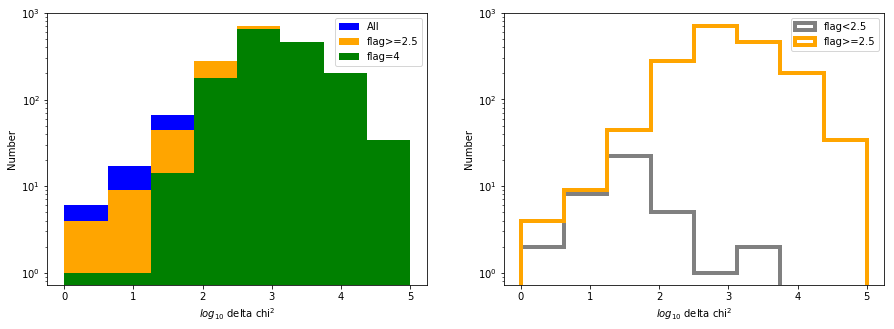

In [11]:
print_simple_number(LRG,'LRG')
plot_redshift_distribution(LRG,'LRG')
plot_chi2_quality_distribution(LRG)

# ELG

# ELG 80606 south

Number of ELG : 3441
Number of  ELG with quality>=2.5: 2588  | fration= 0.7521069456553328
Number of  ELG with quality==4: 1776  | fration= 0.5161290322580645
---------
Fraction of objects with quality>=2.5
Star: 0.00463678516228748
Galaxy: 0.9586553323029366
QSO: 0.03670788253477589


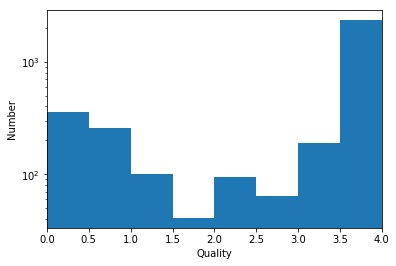

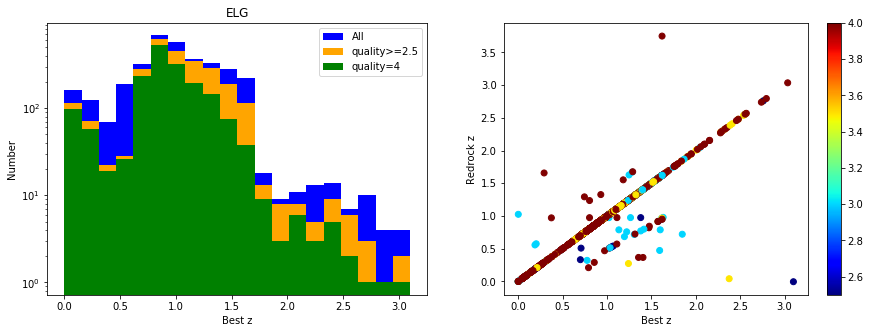

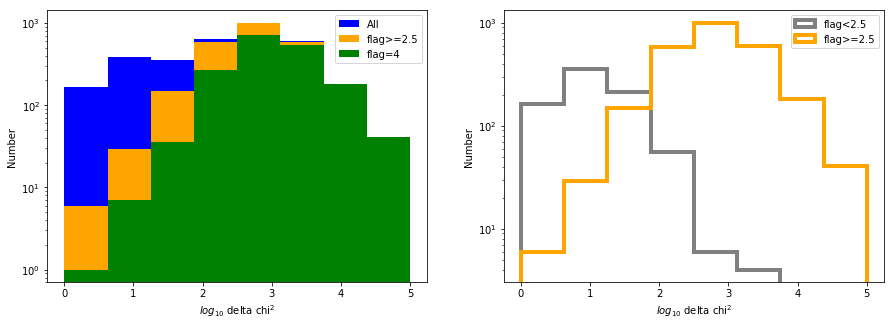

In [12]:
#ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
#ELG = ELG[ELG['best_spectype']=='GALAXY']
print_simple_number(ELG_80606,'ELG')
plot_redshift_distribution(ELG_80606,'ELG')
plot_chi2_quality_distribution(ELG_80606)

# ELG 80608 north

Number of ELG : 3430
Number of  ELG with quality>=2.5: 2514  | fration= 0.7329446064139942
Number of  ELG with quality==4: 1856  | fration= 0.5411078717201167
---------
Fraction of objects with quality>=2.5
Star: 0.017104216388225936
Galaxy: 0.9502784407319014
QSO: 0.03261734287987271


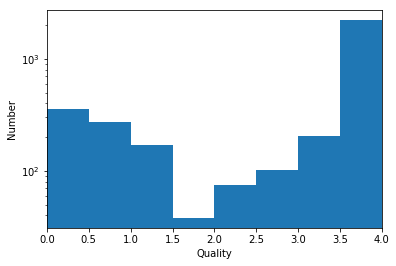

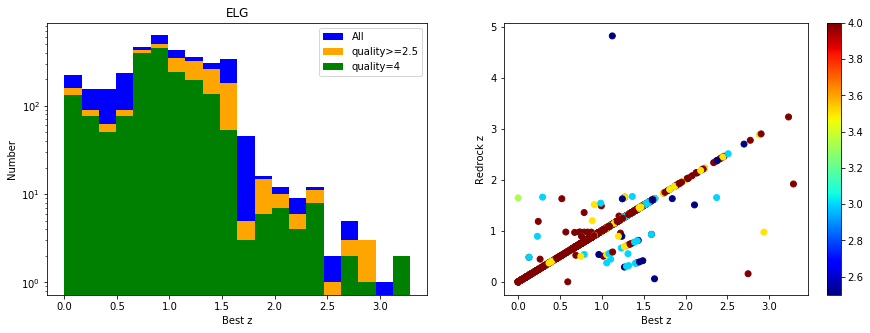

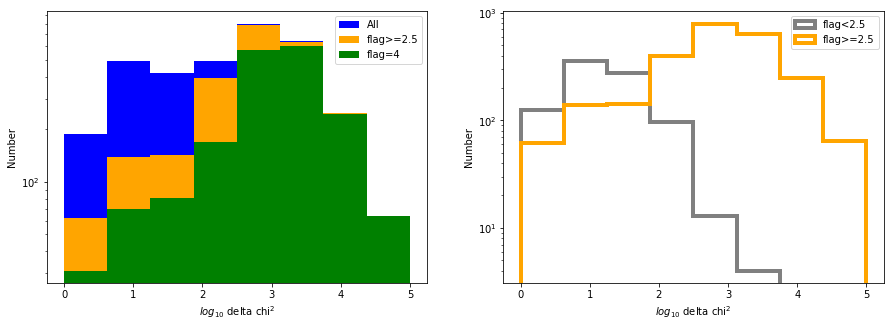

In [13]:
print_simple_number(ELG_80608,'ELG')
plot_redshift_distribution(ELG_80608,'ELG')
plot_chi2_quality_distribution(ELG_80608)

# ELG 80610 COSMOS field

Number of ELG : 3444
Number of  ELG with quality>=2.5: 2679  | fration= 0.7778745644599303
Number of  ELG with quality==4: 1762  | fration= 0.5116144018583043
---------
Fraction of objects with quality>=2.5
Star: 0.0070921985815602835
Galaxy: 0.948488241881299
QSO: 0.044419559537140725


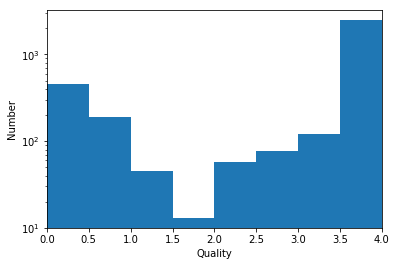

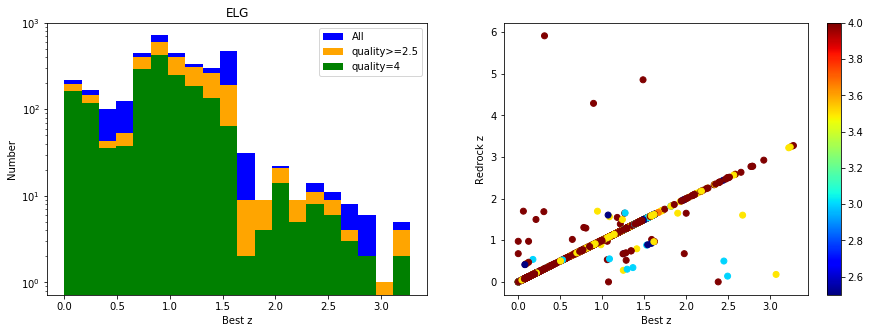

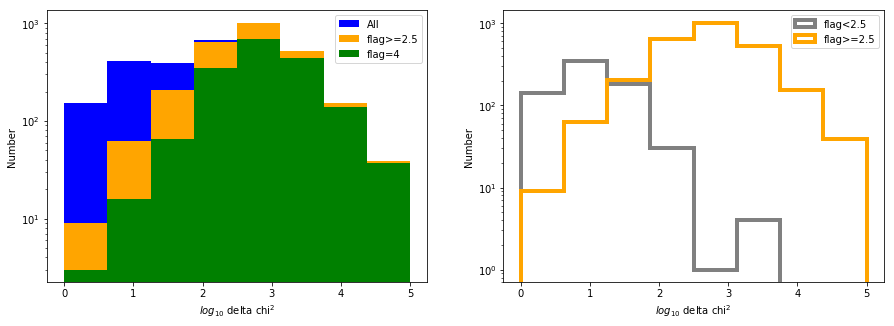

In [22]:
print_simple_number(ELG_80610,'ELG')
plot_redshift_distribution(ELG_80610,'ELG')
plot_chi2_quality_distribution(ELG_80610)

In [14]:
def plot_main_selection():
    x_gt_08 = np.arange(0.85,1.6,0.01)
    plt.plot(x_gt_08,1.6-1.2*x_gt_08,color='black',ls='--',lw=3)
    x_lt_08 = np.arange(0.3,0.85,0.01)
    plt.plot(x_lt_08,1.15*x_lt_08-0.2,color='black',ls='--',lw=3)
    plt.plot([0.3,0.3],[-0.5,0.2],color='black',ls='--',lw=3)
    plt.plot([1.6,1.6],[-0.5,-0.32],color='black',ls='--',lw=3)
    plt.plot([0.3,1.6],[-0.5,-0.5],color='black',ls='--',lw=3)

In [15]:
def select_ELG_main_selection(truth_table,region):
    g = -2.5*np.log10(truth_table['FLUX_G'])+22.5-3.214*truth_table['EBV']
    r = -2.5*np.log10(truth_table['FLUX_R'])+22.5-2.165*truth_table['EBV']
    z = -2.5*np.log10(truth_table['FLUX_Z'])+22.5-1.211*truth_table['EBV']
    gr_color = g-r
    rz_color = r-z
    coii = gr_color + 1.2*rz_color
    if region=='north':
        main_ELG = truth_table[(g>20) & (g<23.5) & (rz_color>0.3) & (rz_color<1.6) &(gr_color<1.15*rz_color-0.2) & (gr_color<-1.2*rz_color+1.6)]
    elif region=='south':
        main_ELG = truth_table[(g>20) & (g<23.4) & (rz_color>0.3) & (rz_color<1.6) &(gr_color<1.15*rz_color-0.15) & (gr_color<-1.2*rz_color+1.6)]
        
    return main_ELG

# Main ELG

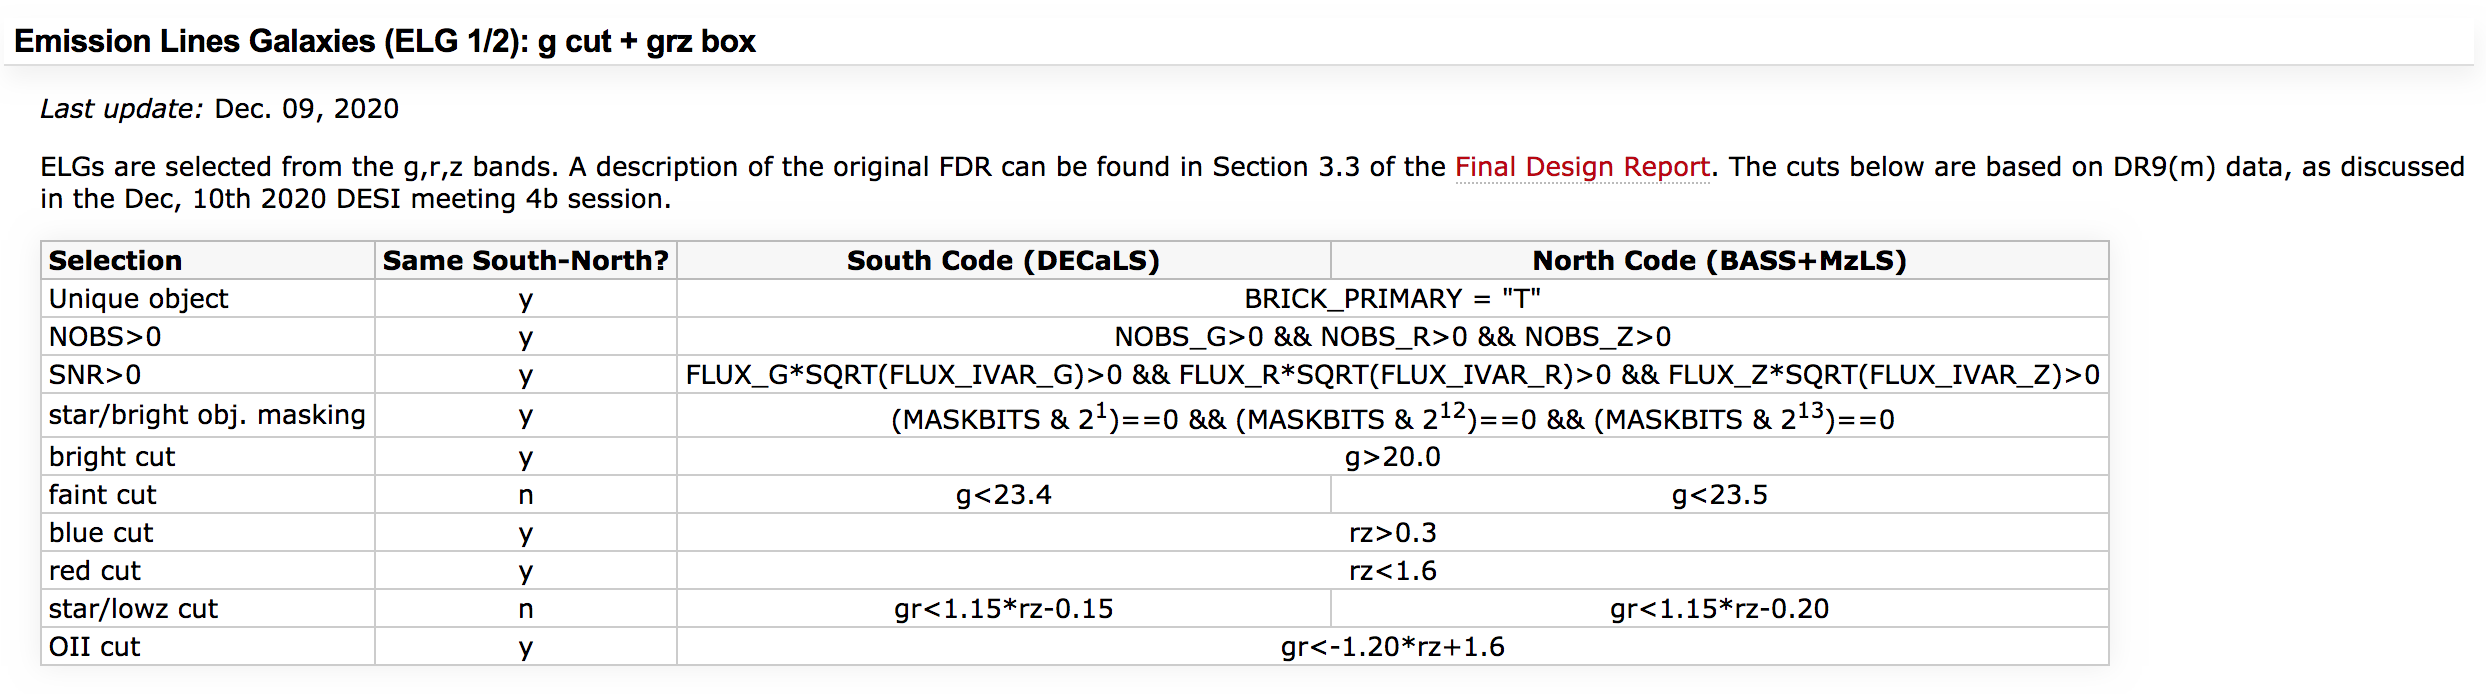

# ELG 80606 south selection

Text(0, 0.5, 'g-r')

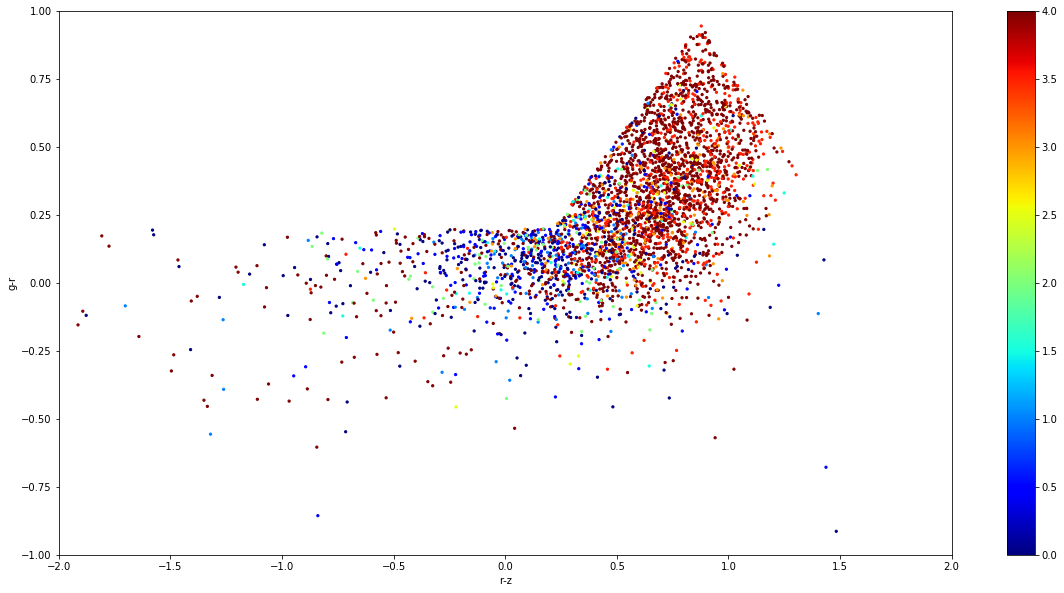

In [16]:
g = -2.5*np.log10(ELG_80606['FLUX_G'])+22.5-3.214*ELG_80606['EBV']
r = -2.5*np.log10(ELG_80606['FLUX_R'])+22.5-2.165*ELG_80606['EBV']
z = -2.5*np.log10(ELG_80606['FLUX_Z'])+22.5-1.211*ELG_80606['EBV']
gr_color = g-r
rz_color = r-z
coii = gr_color + 1.2*rz_color
plt.figure(figsize=(20,10))
plt.scatter(rz_color,gr_color,s=5,c=ELG_80606['best_quality'],cmap=cm.jet,vmax=4,vmin=0)
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.colorbar()
plt.xlabel('r-z')
plt.ylabel('g-r')

In [17]:
main_ELG = select_ELG_main_selection(ELG_80606,'south')

Main selection fraction: 0.3714036617262424
Number of main_ELG : 1278
Number of  main_ELG with quality>=2.5: 1099  | fration= 0.8599374021909233
Number of  main_ELG with quality==4: 769  | fration= 0.6017214397496088
---------
Fraction of objects with quality>=2.5
Star: 0.0018198362147406734
Galaxy: 0.9535941765241128
QSO: 0.044585987261146494


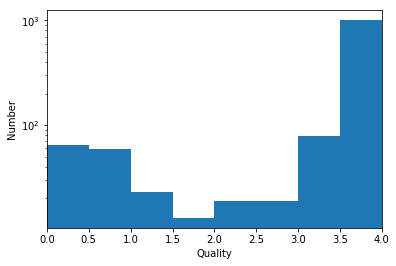

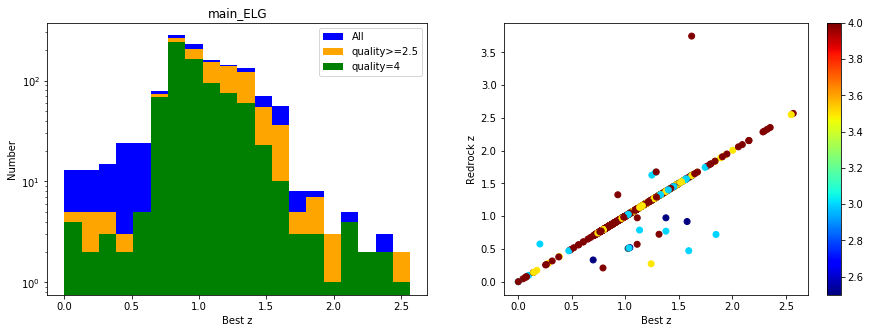

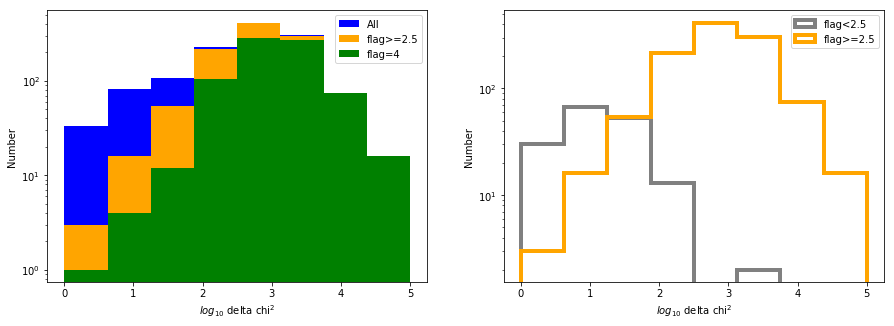

In [18]:
print('Main selection fraction:',len(main_ELG)*1.0/len(ELG_80606))
print_simple_number(main_ELG,'main_ELG')
plot_redshift_distribution(main_ELG,'main_ELG')
plot_chi2_quality_distribution(main_ELG)


# ELG 80608 north selection

Text(0, 0.5, 'g-r')

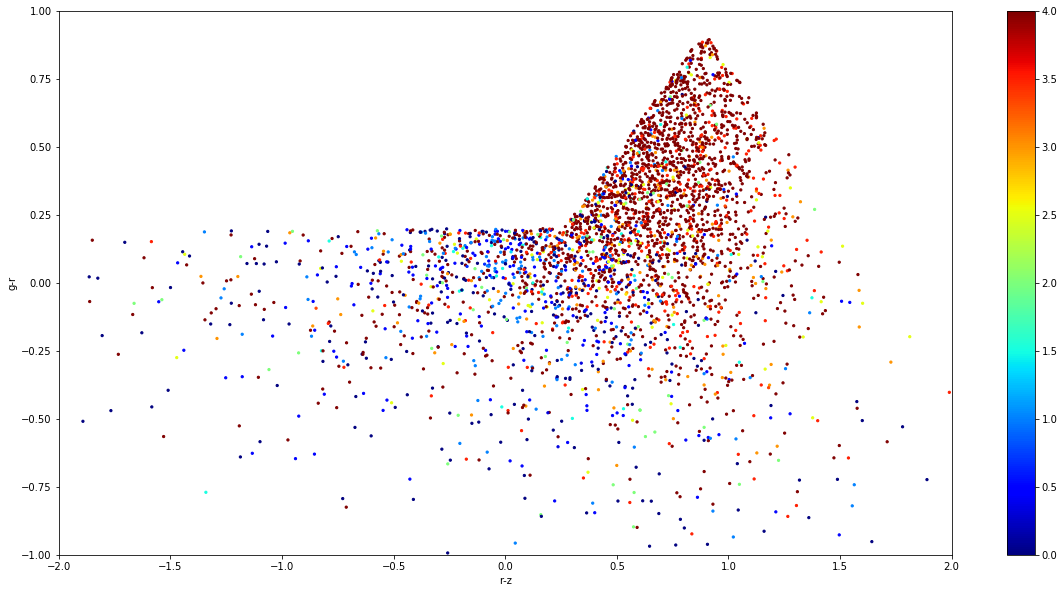

In [19]:
g = -2.5*np.log10(ELG_80608['FLUX_G'])+22.5-3.214*ELG_80608['EBV']
r = -2.5*np.log10(ELG_80608['FLUX_R'])+22.5-2.165*ELG_80608['EBV']
z = -2.5*np.log10(ELG_80608['FLUX_Z'])+22.5-1.211*ELG_80608['EBV']
gr_color = g-r
rz_color = r-z
coii = gr_color + 1.2*rz_color
plt.figure(figsize=(20,10))
plt.scatter(rz_color,gr_color,s=5,c=ELG_80608['best_quality'],cmap=cm.jet,vmax=4,vmin=0)
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.colorbar()
plt.xlabel('r-z')
plt.ylabel('g-r')

In [20]:
main_ELG = select_ELG_main_selection(ELG_80608,'north')

Main selection fraction: 0.336734693877551
Number of main_ELG : 1155
Number of  main_ELG with quality>=2.5: 973  | fration= 0.8424242424242424
Number of  main_ELG with quality==4: 719  | fration= 0.6225108225108225
---------
Fraction of objects with quality>=2.5
Star: 0.0020554984583761563
Galaxy: 0.9660842754367934
QSO: 0.03186022610483042


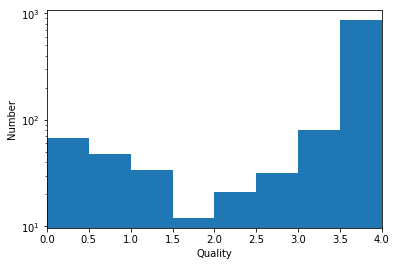

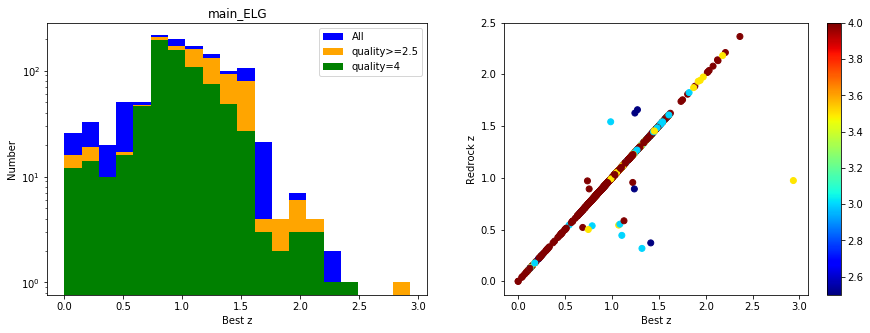

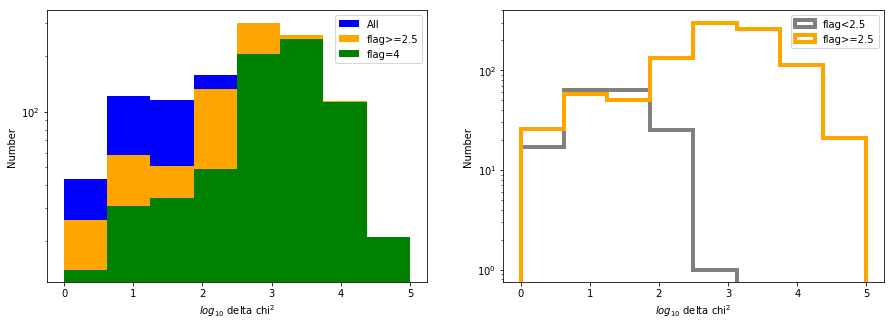

In [21]:
print('Main selection fraction:',len(main_ELG)*1.0/len(ELG_80608))
print_simple_number(main_ELG,'main_ELG')
plot_redshift_distribution(main_ELG,'main_ELG')
plot_chi2_quality_distribution(main_ELG)


# ELG main selection south 80610

Main selection fraction: 0.33710801393728224
Number of main_ELG : 1161
Number of  main_ELG with quality>=2.5: 1014  | fration= 0.8733850129198967
Number of  main_ELG with quality==4: 661  | fration= 0.5693367786391043
---------
Fraction of objects with quality>=2.5
Star: 0.0029585798816568047
Galaxy: 0.9358974358974359
QSO: 0.0611439842209073


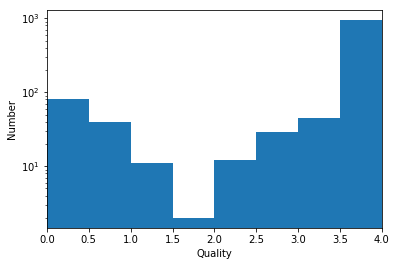

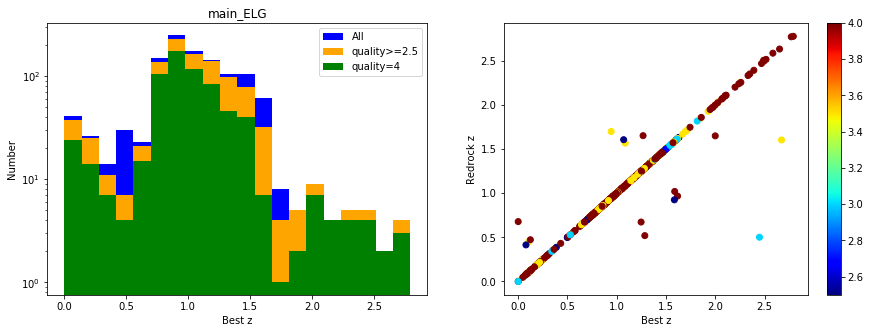

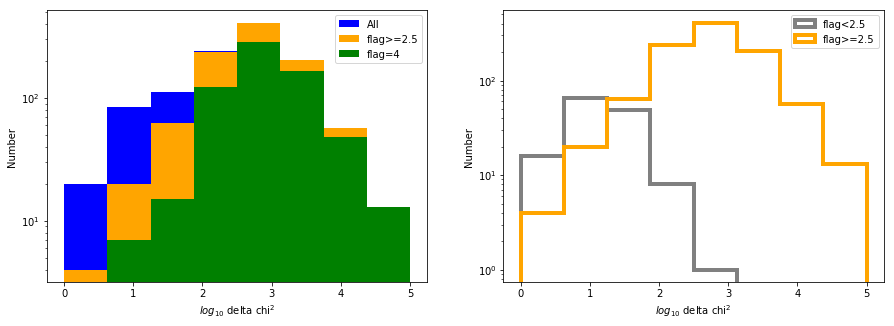

In [26]:
main_ELG = select_ELG_main_selection(ELG_80610,'south')
print('Main selection fraction:',len(main_ELG)*1.0/len(ELG_80610))
print_simple_number(main_ELG,'main_ELG')
plot_redshift_distribution(main_ELG,'main_ELG')
plot_chi2_quality_distribution(main_ELG)


Text(0, 0.5, 'g-r')

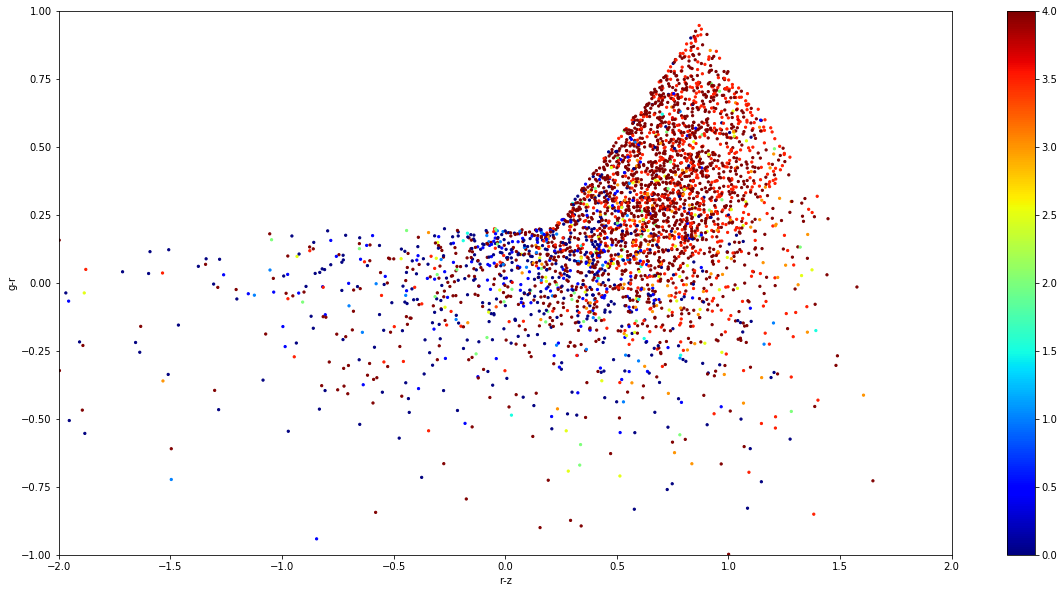

In [23]:
g = -2.5*np.log10(ELG_80610['FLUX_G'])+22.5-3.214*ELG_80610['EBV']
r = -2.5*np.log10(ELG_80610['FLUX_R'])+22.5-2.165*ELG_80610['EBV']
z = -2.5*np.log10(ELG_80610['FLUX_Z'])+22.5-1.211*ELG_80610['EBV']
gr_color = g-r
rz_color = r-z
coii = gr_color + 1.2*rz_color
plt.figure(figsize=(20,10))
plt.scatter(rz_color,gr_color,s=5,c=ELG_80610['best_quality'],cmap=cm.jet,vmax=4,vmin=0)
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.colorbar()
plt.xlabel('r-z')
plt.ylabel('g-r')